<a href="https://www.kaggle.com/code/sinjeongyeol/spaceshiptitanic-binaryclassification-1?scriptVersionId=99500188" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# this notebook is very simple xgboost
# rarely feature engineering 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
submission = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
columns_description = {
    'PassengerId': "'gggg_pp' Id, 'gggg': group id, 'pp': personal id within group",
    'HomePlanet': "Hometown planet",
    'CryoSleep': "frozen sleep",
    'Cabin': "cabin number where the passenger is staying", 
    'Destination': "planet destination",
    'Age': 'age', 
    'VIP': "paid for special VIP service",
    'RoomService': "billed at luxury amenity",
    'FoodCourt': "billed at luxury amenity",
    'ShoppingMall': "billed at luxury amenity",
    'Spa': "billed at luxury amenity",
    'VRDeck': "billed at luxury amenity",
    'Name': "name",
    'Transported': "Target"
}

In [6]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
train.shape, test.shape

((8693, 14), (4277, 13))

## Null data check

In [9]:
null_df = pd.DataFrame()
null_cnt = []
null_percent = []
for col in train.columns:
    cnt = train[col].isnull().sum()
    null_cnt += [cnt]
    null_percent += [cnt / len(train) * 100]
null_df['feature'] = train.columns
null_df['null_count'] = null_cnt
null_df['null_percent'] = null_percent
null_df.sort_values('null_count', ascending=False, inplace=True)
null_df

,feature,null_count,null_percent
2,CryoSleep,217,2.496261
9,ShoppingMall,208,2.392730
6,VIP,203,2.335212
1,HomePlanet,201,2.312205
12,Name,200,2.300702
3,Cabin,199,2.289198
11,VRDeck,188,2.162660
8,FoodCourt,183,2.105142
10,Spa,183,2.105142
4,Destination,182,2.093639


<AxesSubplot:>

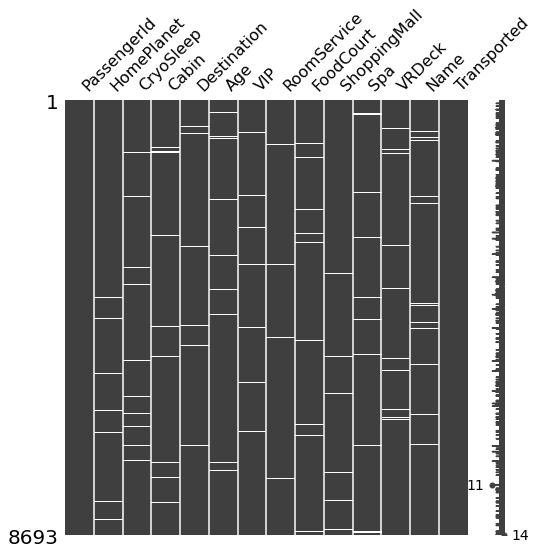

In [10]:
import missingno as msno
msno.matrix(df=train.iloc[:, :], figsize=(8, 8))

<AxesSubplot:>

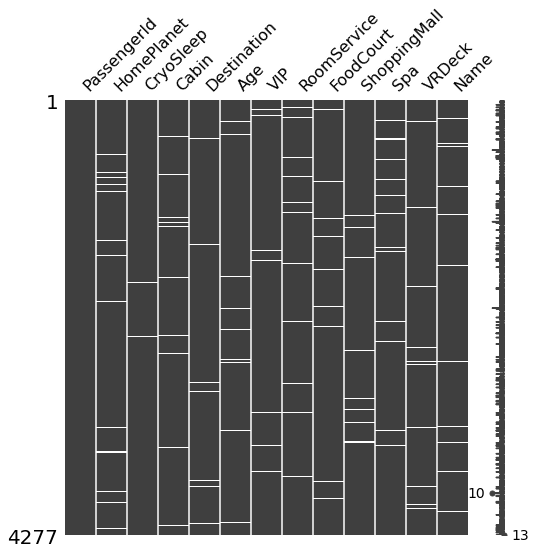

In [11]:
msno.matrix(df=test.iloc[:, :], figsize=(8, 8))

In [12]:
feats_cat = []
feats_num = []
for col in train.columns:
    if col in ['PassengerId', 'Transported']:
        continue
    if train[col].dtype == 'object':
        feats_cat += [col]
    else:
        feats_num += [col]
        
feats_cat, feats_num

(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name'],
 ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])

## Target label

<AxesSubplot:ylabel='frequency'>

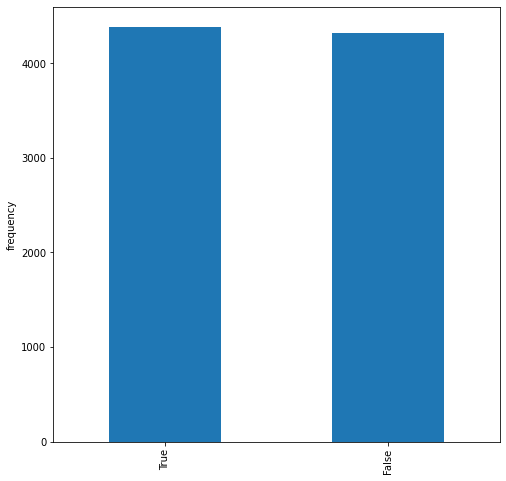

In [13]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8, 8))
train['Transported'].value_counts().plot(ax=ax, kind='bar', ylabel='frequency')

### continuous & categorical feature

In [14]:
num_feats, cat_feats = [], []
for col in train.columns:
    if train[col].dtype == 'object':
        cat_feats += [col]
    elif train[col].dtype == 'float64':
        num_feats += [col]

In [15]:
num_feats, cat_feats

(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
 ['PassengerId',
  'HomePlanet',
  'CryoSleep',
  'Cabin',
  'Destination',
  'VIP',
  'Name'])

### PassengerId

In [16]:
train['PassengerId'].isnull().sum()

0

### HomePlanet

In [17]:
train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [18]:
def Target_True_func(x):
    return (x == True).sum()

def Target_False_func(x):
    return (x == False).sum()
    
train[['HomePlanet', 'Transported']].groupby('HomePlanet').agg([Target_True_func, Target_False_func])

Transported                  
           Target_True_func Target_False_func
HomePlanet                                   
Earth                  1951              2651
Europa                 1404               727
Mars                    920               839

In [19]:
pd.crosstab(train['HomePlanet'], train['Transported'], margins=True)

Transported,False,True,All
HomePlanet,,,
Earth,2651,1951,4602
Europa,727,1404,2131
Mars,839,920,1759
All,4217,4275,8492


<AxesSubplot:xlabel='HomePlanet'>

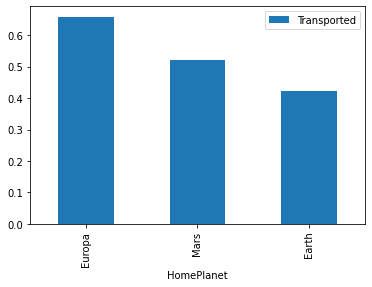

In [20]:
train[['HomePlanet', 'Transported']].groupby('HomePlanet').mean().sort_values('Transported', ascending=False).plot.bar()

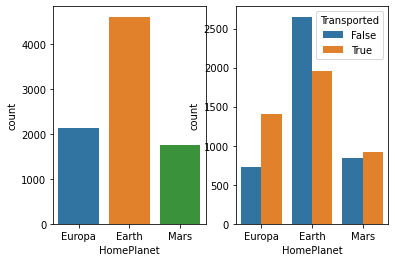

In [21]:
import seaborn as sns
fig, ax = plt.subplots(1, 2)
sns.countplot(x='HomePlanet', data=train, ax=ax[0])
sns.countplot(x='HomePlanet', hue='Transported',data=train, ax=ax[1])
plt.show()

In [22]:
cat_feats

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

### CryoSleep

In [23]:
train['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

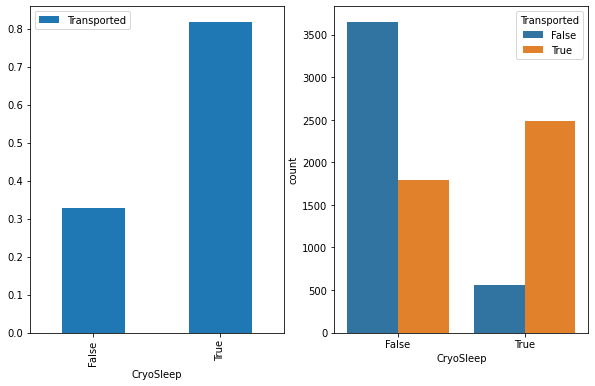

In [24]:
f, ax = plt.subplots(1, 2, figsize=(10, 6))
train[['CryoSleep', 'Transported']].groupby('CryoSleep').mean().plot.bar(ax=ax[0])
sns.countplot(x='CryoSleep', data=train, ax=ax[1], hue='Transported')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


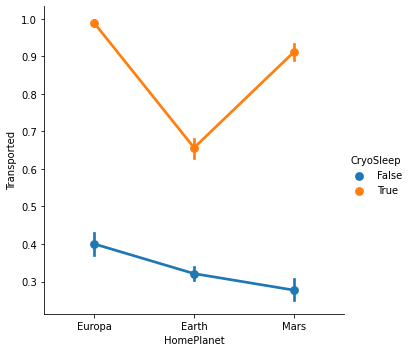

In [25]:
sns.factorplot('HomePlanet', 'Transported', hue='CryoSleep', data=train)

In [26]:
cat_feats

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

### Cabin

In [27]:
train['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [28]:
feat_extension = ['PassengerId', 'Cabin']

In [29]:
cat_feats

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

### Destination

In [30]:
train['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='count'>

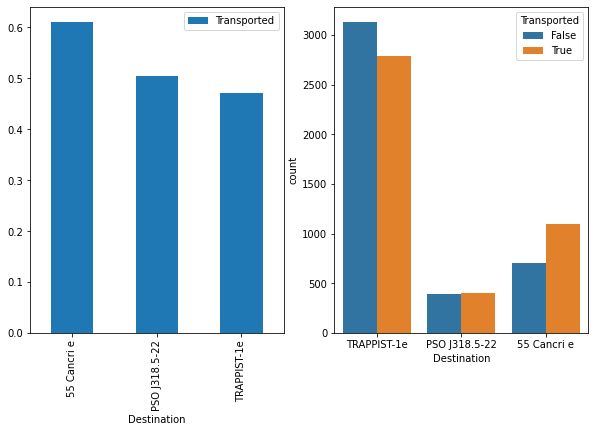

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
train[['Destination', 'Transported']].groupby('Destination').mean().plot.bar(ax=ax[0])
sns.countplot(x='Destination', hue='Transported', data=train, ax=ax[1])

In [32]:
pd.crosstab(index=train['Destination'], columns=train['HomePlanet'], normalize='index', margins=True)

HomePlanet,Earth,Europa,Mars
Destination,,,
55 Cancri e,0.390051,0.500848,0.109101
PSO J318.5-22,0.912821,0.024359,0.062821
TRAPPIST-1e,0.537901,0.206245,0.255854
All,0.541617,0.251864,0.206519


### VIP

In [33]:
train['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

<AxesSubplot:xlabel='VIP', ylabel='count'>

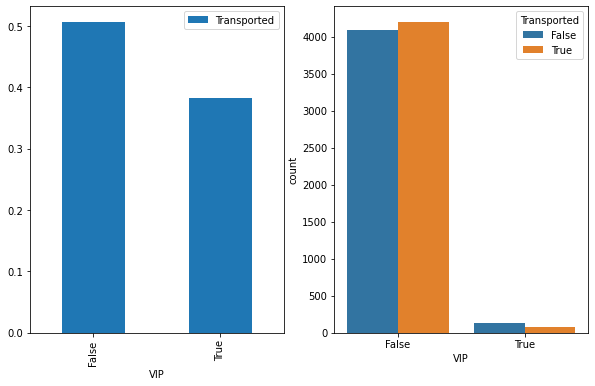

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
train[['VIP', 'Transported']].groupby('VIP').mean().plot.bar(ax=ax[0])
sns.countplot(x='VIP', hue='Transported', data=train, ax=ax[1])

In [35]:
cat_feats

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

### Name

In [36]:
len(train['Name'].unique()), len(train)

(8474, 8693)

In [37]:
cat_feats, num_feats

(['PassengerId',
  'HomePlanet',
  'CryoSleep',
  'Cabin',
  'Destination',
  'VIP',
  'Name'],
 ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])

### Age

In [38]:
train['Age'].max(), train['Age'].min(), train['Age'].mean()

(79.0, 0.0, 28.82793046746535)

<AxesSubplot:xlabel='Age', ylabel='Density'>

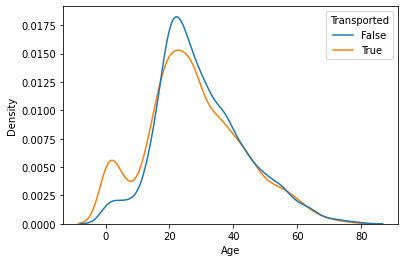

In [39]:
sns.kdeplot(x='Age', hue='Transported', data=train)

### RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

14327.0 0.0 224.687617481203
29813.0 0.0 458.07720329024676
23492.0 0.0 173.72916912197996
22408.0 0.0 311.1387779083431
24133.0 0.0 304.8547912992357


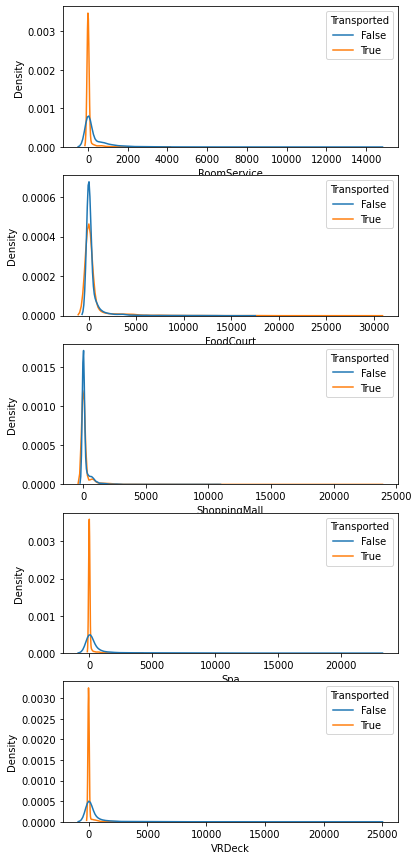

In [40]:
import copy
num_feats_ = copy.deepcopy(num_feats)
num_feats_.remove('Age')
fig, axes = plt.subplots(len(num_feats_), 1, figsize=(6, 15))
for i, col in enumerate(num_feats_):
    print(train[col].max(), train[col].min(), train[col].mean())
    sns.kdeplot(x=col, hue='Transported', data=train, ax=axes[i])

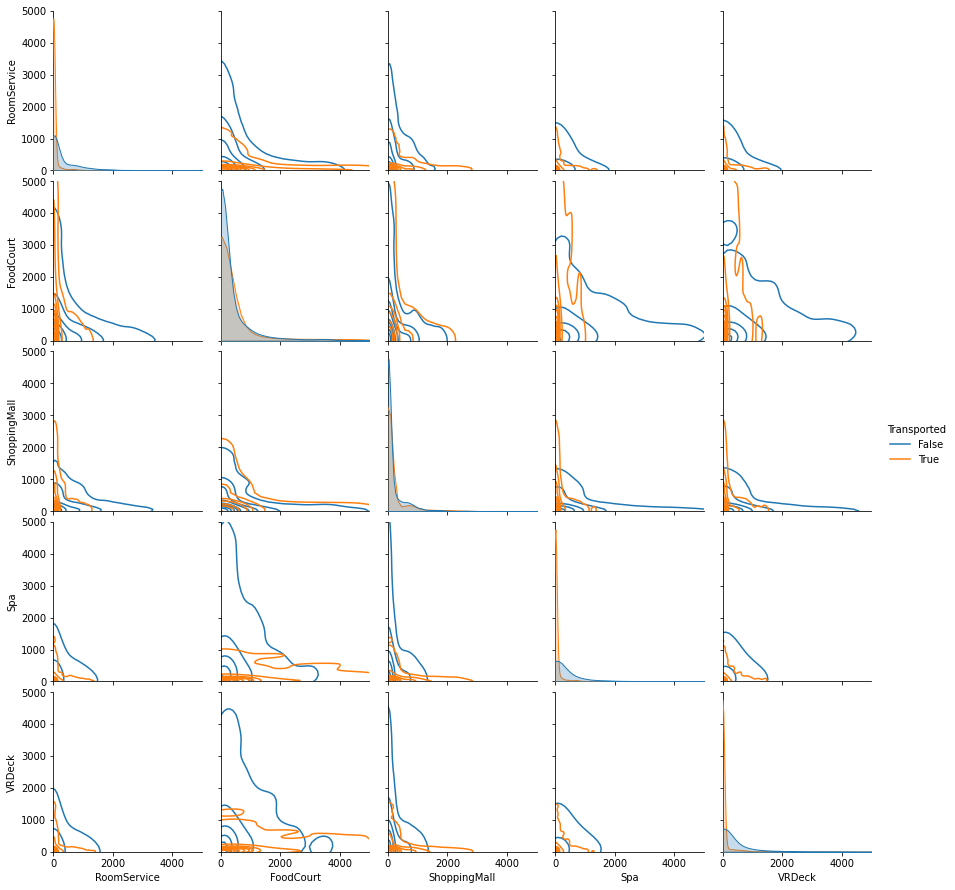

In [41]:
g = sns.pairplot(train[num_feats_+['Transported']], hue='Transported', kind='kde')
g.set(ylim=(0, 5000), xlim=(0, 5000))

## Feature engineering

In [42]:
dataset = pd.concat([train, test], axis=0).reset_index(drop=True)
dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [43]:
dataset = dataset.drop(columns=['PassengerId', 'Cabin', 'Name'])

In [44]:
dataset.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [45]:
cat_feats

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

In [46]:
cat_feats = list(set(cat_feats) - set(['PassengerId', 'Cabin', 'Name']))
cat_feats

['CryoSleep', 'VIP', 'Destination', 'HomePlanet']

In [47]:
dataset = pd.get_dummies(dataset, columns=cat_feats)
dataset.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,39.0,0.0,0.0,0.0,0.0,0.0,False,1,0,1,0,0,0,1,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,1,0,1,0,0,0,1,1,0,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,1,0,0,1,0,0,1,0,1,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,1,0,1,0,0,0,1,0,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,True,1,0,1,0,0,0,1,1,0,0


## model (XGBoost)

In [48]:
train_length = len(train)
train, test = dataset[:train_length], dataset[train_length:]

In [49]:
train_y = train['Transported']
train_x = train.drop('Transported', axis=1)

In [50]:
test = test.drop('Transported', axis=1)

In [51]:
from xgboost import plot_importance
from xgboost import XGBClassifier

In [52]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_x, train_y, random_state=0, shuffle=True, stratify=train_y, test_size=0.2)

In [53]:
x_train.shape, x_val.shape, y_train.shape

((6954, 16), (1739, 16), (6954,))

In [54]:
from sklearn.metrics import accuracy_score
xgb = XGBClassifier()
xgb.fit(x_train, y_train, eval_set=[(x_val, y_val)], eval_metric='error', verbose=True)

[0]	validation_0-error:0.23979
[1]	validation_0-error:0.22944
[2]	validation_0-error:0.22082
[3]	validation_0-error:0.22542
[4]	validation_0-error:0.22024
[5]	validation_0-error:0.21967
[6]	validation_0-error:0.21507
[7]	validation_0-error:0.21392
[8]	validation_0-error:0.21507
[9]	validation_0-error:0.21622
[10]	validation_0-error:0.21794


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,


[11]	validation_0-error:0.21679
[12]	validation_0-error:0.21564
[13]	validation_0-error:0.21622
[14]	validation_0-error:0.21392
[15]	validation_0-error:0.21449
[16]	validation_0-error:0.21392
[17]	validation_0-error:0.21392
[18]	validation_0-error:0.21219
[19]	validation_0-error:0.21162
[20]	validation_0-error:0.21162
[21]	validation_0-error:0.21047
[22]	validation_0-error:0.21277
[23]	validation_0-error:0.21162
[24]	validation_0-error:0.21162
[25]	validation_0-error:0.21162
[26]	validation_0-error:0.21162
[27]	validation_0-error:0.21104
[28]	validation_0-error:0.21104
[29]	validation_0-error:0.21104
[30]	validation_0-error:0.21104
[31]	validation_0-error:0.21334
[32]	validation_0-error:0.21162
[33]	validation_0-error:0.21162
[34]	validation_0-error:0.21277
[35]	validation_0-error:0.21162
[36]	validation_0-error:0.21104
[37]	validation_0-error:0.21162
[38]	validation_0-error:0.21277
[39]	validation_0-error:0.21047
[40]	validation_0-error:0.21162
[41]	validation_0-error:0.21277
[42]	val

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

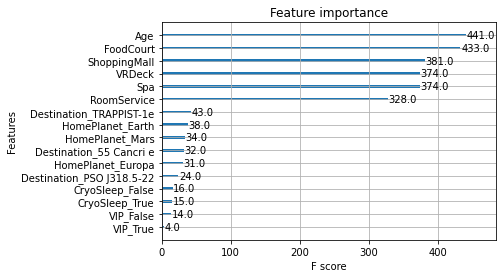

In [55]:
plot_importance(xgb)

In [56]:
submission['Transported'] = xgb.predict(test).astype('bool')
submission.to_csv('sampleSubmission.csv', index=False)